# Assignment 3 - EM and Bayes Nets

### Question 1.  EM
**This Assignment requires you to write a Python program that loads the Iris dataset from the first assignment and apply EM with a Gaussian mixture model on the IRIS data. You are not allowed to use any Python library for the EM algorithm itsef, but you are of course allowed to use other helper functions. You might compare the results of your program with sklearn models, but the whole exercise is to write the algorithm yourself.**

**1.1 Write a program to implement EM with a Gaussian mixture model on the Iris dataset for k=3 and plot the Sepal data points with a color coding based on the obtained clusters.  More specifically, you can plot the data points with color where the RGB colour values correspond to the probability estimates of a data point belonging to each class.**

C:\Users\dalal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


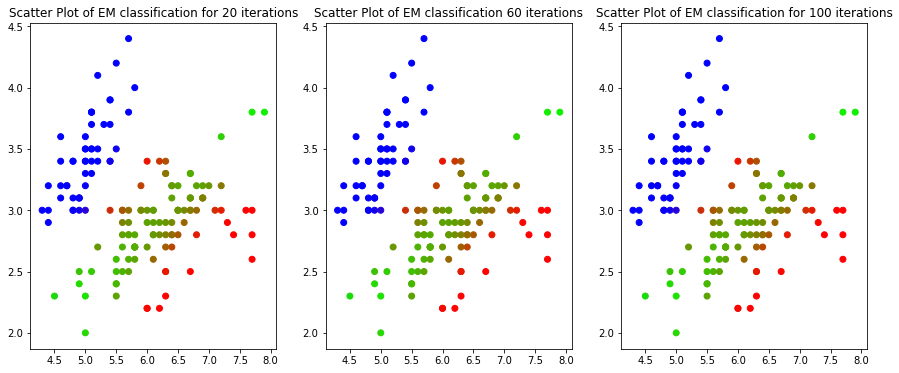

In [1]:
# Code Reference
# https://gist.github.com/bistaumanga/6023716#file-gmm-py-L139

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets 
iris = datasets.load_iris()
#Loading the data set:
X = iris.data
y = iris.target
X_sepal = X[:,0:2]

def EM(k, X, iters):
        
    # n = number of data-points, d = dimension of data points        
    n, d = X.shape
    
    # randomly choose the starting centroids/means 
    ## as k of the points from datasets
    random.seed(10)
    mu = X[np.random.choice(n, k, False), :]
        
    # initialize the covariance matrices for each gaussians
    Sigma= [np.eye(d)] * k
        
    # initialize the probabilities/weights for each gaussians
    phi = [1./k] * k
      
    #Gaussian Term
    NG = lambda mu, s: np.linalg.det(s) ** -.5 * (2 * np.pi) ** (-X.shape[1]/2.) \
                * np.exp(-.5 * np.einsum('ij, ij -> i',\
                        X - mu, np.dot(np.linalg.inv(s) , (X - mu).T).T ) )
    
    k_prob = np.array([[0.0]*k for i in range(n)])
    
    for i in range(iters):
        
        # E Step
        for l in range(k):
            k_prob[:, l] = phi[l] * NG(mu[l], Sigma[l])
        
        ## Normalize so that the responsibility matrix is row stochastic
        k_prob = (k_prob.T / np.sum(k_prob, axis = 1)).T
            
        
        # M Step
        ## The number of datapoints belonging to each gaussian
        weights = np.array(np.sum(k_prob, axis = 0))
        #PHI
        phi = (1./ n) * weights
        
        ## calculate the new mean and covariance for each gaussian
        for l in range(k):
            # mean
            mu[l,:] = 1. / weights[l] * (np.dot(k_prob[:, l], X))
            x_mu = np.matrix(X - mu[l,:])
                
            ## covariances
            Sigma[l] = np.array(1 / weights[l] * np.dot(np.multiply(x_mu.T,  k_prob[:, l]), x_mu))
            
        class_label = k_prob.argmax(axis = 1)
        
    return class_label,k_prob

labl_20,class_prob = EM(3, X_sepal,20)
labl_60,class_prob = EM(3, X_sepal,60)
labl_100,class_prob = EM(3, X_sepal,100)

fig, axes = plt.subplots(1, 3, figsize=(15,6))
      
axes[0].scatter(X_sepal[:, 0], X_sepal[:, 1],facecolor = class_prob)
axes[0].set_title("Scatter Plot of EM classification for 20 iterations")

axes[1].scatter(X_sepal[:, 0], X_sepal[:, 1],facecolor = class_prob)
axes[1].set_title("Scatter Plot of EM classification 60 iterations")

axes[2].scatter(X_sepal[:, 0], X_sepal[:, 1],facecolor = class_prob)
axes[2].set_title("Scatter Plot of EM classification for 100 iterations")

fig.show()

**Question1.2 Evaluate the prediction quality with different number of assumed classes (k=2,3,4). Explain briefly your evaluation method and discuss your finding.**

I will be using confusing matrix to evaluate the quality of the prediction.

In [2]:
#Plot reference
# https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report#44188254
from sklearn.metrics import classification_report
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        #print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

**k=2**

C:\Users\dalal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 3, does not match size of target_names, 2
  .format(len(labels), len(target_names))
C:\Users\dalal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.50      1.00      0.66        50

avg / total       0.50      0.66      0.55       150



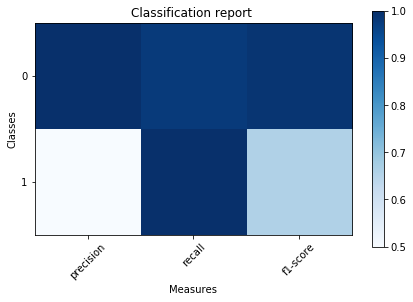

In [3]:
labl_2,class_prob = EM(2, X_sepal,60)
classificationReport = classification_report(y, labl_2, target_names = ['0', '1'])
print(classificationReport)
plot_classification_report(classificationReport)
plt.show()

**k=3**

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.19      0.06      0.09        50
          2       0.44      0.74      0.55        50

avg / total       0.54      0.59      0.54       150



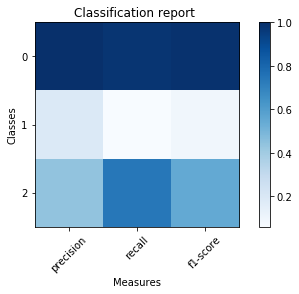

In [4]:
labl_3,class_prob = EM(3, X_sepal,100)
classificationReport = classification_report(y, labl_3, target_names = ['0', '1', '2'])
print(classificationReport)
plot_classification_report(classificationReport)
plt.show()

**k=4**

C:\Users\dalal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.38      0.30      0.34        50
          3       0.00      0.00      0.00         0

avg / total       0.13      0.10      0.11       150



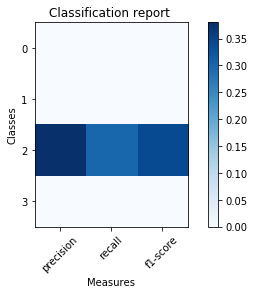

In [5]:
labl_4,class_prob = EM(4, X_sepal,100)
classificationReport = classification_report(y, labl_4, target_names = ['0', '1', '2','3'])
print(classificationReport)
plot_classification_report(classificationReport)
plt.show()

It is evident from the classification report graph that the classification works best for k = 3. The classification report consist of precision, f1 score, recall and over all accuracy of the prediction. Recall is also called as True positive rate of the prediction which we are interested in. However, the classification is not constant and changing with every run of the method and hence it is not reliable. So, one of the method I suggest to evaluate the quality of prediction is through scattor plot.

C:\Users\dalal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


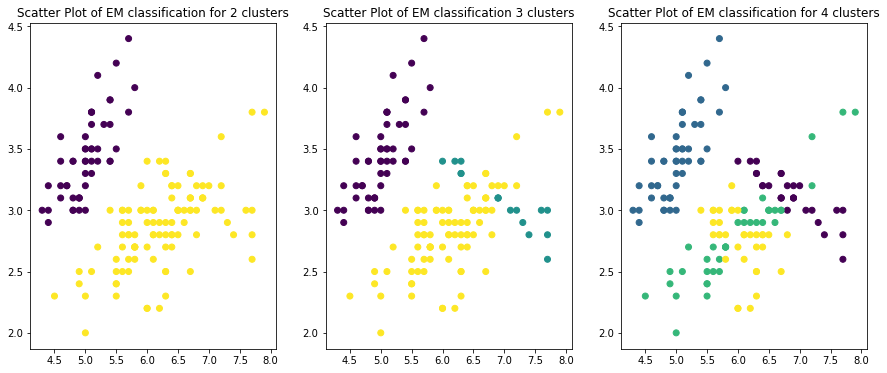

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
      
axes[0].scatter(X_sepal[:, 0], X_sepal[:, 1],c = labl_2)
axes[0].set_title("Scatter Plot of EM classification for 2 clusters")

axes[1].scatter(X_sepal[:, 0], X_sepal[:, 1],c = labl_3)
axes[1].set_title("Scatter Plot of EM classification 3 clusters")

axes[2].scatter(X_sepal[:, 0], X_sepal[:, 1],c = labl_4)
axes[2].set_title("Scatter Plot of EM classification for 4 clusters")

fig.show()

### Question2. Causal Model
**This Assignment requires you to write a Python script to calculate some inference of a simplified version of the car repair example from the manuscript. Given are the following probabilities: 
The marginal probability that the alternator is broken is 1/1000 and the marginal probability that the fan belt is broken is 2/100. The probability that the battery is charging when either the alternator or the fan belt is broken is zero. However, even if both are working there is a 5/1000 probability that the battery is not charging. When the battery is not charging then there is a 90% chance that the battery is flat, though even if the battery is charging then there is a 10% chance that the battery is flat. Finally, the car does not start if either the battery is flat, or there is no gas, or the starter is broken. However. Even if these three conditions don’t hold there is a 5% chance that the car won’t start. **

In [7]:
from lea import *
import numpy as np

broken_alternator = Lea.boolProb(1,1000)
broken_belt = Lea.boolProb(2,100)
broken_starter = Lea.boolProb(0,100)

gas_empty = Lea.boolProb(0,100)

battery_not_charging = Lea.buildCPT((broken_alternator | broken_belt , Lea.boolProb(1,1)),
                                    (~broken_alternator & ~broken_belt , Lea.boolProb(5,1000)))
                                    
battery_flat_issue= Lea.buildCPT((battery_not_charging , Lea.boolProb(9,10)),
                            (~battery_not_charging , Lea.boolProb(1,10)))

car_wont_start = Lea.buildCPT((battery_flat_issue| broken_starter |gas_empty , Lea.boolProb(1,1)),
                              (~battery_flat_issue & ~broken_starter & ~gas_empty , Lea.boolProb(5,100)))

**2.1 Probability that the alternator is broken given that the car won’t start.**

In [8]:
print(broken_alternator.given(car_wont_start))

False : 40940019/41166269
 True :   226250/41166269


**2.3. What is the probability that the fan belt is broken given that the car won’t start?**

In [9]:
print(broken_belt.given(car_wont_start))

False : 36641269/41166269
 True :  4525000/41166269


**2.4 What is the probability that the fan belt is broken given that the car won’t start and the alternator is broken?**

In [10]:
print(broken_belt.given(car_wont_start & broken_alternator))

False : 49/50
 True :  1/50


**2.5.	What is the probability that the alternator and the fan belt is broken given that the car won’t start?**

In [11]:
print((broken_alternator & broken_belt).given(car_wont_start))

False : 41161744/41166269
 True :     4525/41166269


### Question 3 Naive Bayes
**This Assignment requires you to write a Python program to test a simple binominal version of the Naïve Bayes algorithm on the 20newsgroups dataset. You need to read the data and work with sparse data in python. You should write a Naïve Bayes program on your own (not using library function) to implement the binomial version of the Naïve Bayes rule outlined in the manuscript. Please provide the results in form of a confusion matrix.**

In [12]:
#Code Refernce:
#https://github.com/keith-mcqueen/20-newsgroups

from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:

categories = fetch_20newsgroups(subset='train').target_names
newsgroups_train = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
train_data = pd.DataFrame({"x": newsgroups_train.data,
                           "y": newsgroups_train.target})


# constructing feature vector
vectorizer = CountVectorizer(stop_words="english", binary=True)
X = vectorizer.fit_transform(train_data["x"])

x = X.toarray()

# splitting into train and test
x_train = np.split(x, [int(len(x)*0.7), len(x)])[0]
x_test = np.split(x, [int(len(x)*0.7), len(x)])[1]
y = np.array(train_data["y"])
y_train = np.split(y,[int(len(y)*0.7), len(y)])[0]
y_test = np.split(y,[int(len(y)*0.7), len(y)])[1]

# calculating probability_prior and probability for each word per document class
probability_prior = np.array([])
estimate_word = np.array([])
for i in np.unique(y):
    probability_prior = np.append(probability_prior, len(y_train[y_train == i])/len(y_train))
    if i == 0:
        estimate_word = np.append(estimate_word,(np.sum(x_train[y_train == i], axis=0)+1)/(len(y_train[y_train == i])+2))
    elif i == 1:
        estimate_word = np.append([estimate_word],
                                  [(np.sum(x_train[y_train == i], axis=0)+1)/(len(y_train[y_train == i])+2)],axis=0)
    else:
        estimate_word = np.append(estimate_word,[(np.sum(x_train[y_train == i], axis=0)+1)/(len(y_train[y_train == i])+2)],
                                     axis=0)


# predict
predicted_target = np.array([])
for j in range(len(x_test)):
    proab_predict = np.array([])
    for i in np.unique(train_data["y"]):
        proababilty_posterior = ((estimate_word[i] * x_test[j]) +
                             ((1 - estimate_word[i]) * (1 - x_test[j])))
        proababilty_posterior = np.prod(proababilty_posterior) * probability_prior[i]
        proab_predict = np.append(proab_predict, proababilty_posterior)

    predicted_target = np.append(predicted_target, np.argmax(proab_predict))
print(accuracy_score(predicted_target, y_test))


0.341973490427


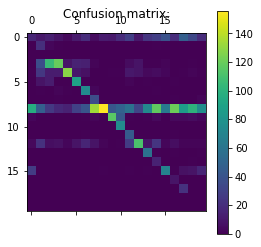

In [15]:
import matplotlib.pyplot as plt
cm = confusion_matrix(predicted_target, y_test)
#print(cm) #As it is quite big not printing it. 
plt.matshow(cm)
plt.title("Confusion matrix:")
plt.colorbar()
plt.show()